<a href="https://colab.research.google.com/github/vncsferreiraguiar/Python/blob/main/relatorio_da_biblioteca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Empréstimo de uma Biblioteca

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
endereco = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/blob/main/Dia_1-Importando_dados/Datasets/dados_emprestimos'
anos = list(range(2010,2021))
arquivos = []
dados_emprestimo = pd.DataFrame() 

# Alimenta a lista de arquivos
for ano in anos:
    for bimestre in list(range(1,3)):
        arquivos.append(f'emprestimos-{ano}{bimestre}.csv')
        
# Alimenta o Dataframe dados_emprestimo com todos os arquivos do diretório Github
for arquivo in arquivos[0:21]: 
    arquivo_corrente = pd.read_csv(endereco+'/'+arquivo+'?raw=true')
    dados_emprestimo = pd.concat([dados_emprestimo, arquivo_corrente])

dados_emprestimo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
26556,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
26557,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
26558,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
26559,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO


## Verifica linhas duplicatas

In [3]:
dados_emprestimo.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709704         2006021442     2010/01/17 18:56:43.923000000  2010/01/04 09:58:46.522000000  2010/02/01 13:59:02.528000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709705         2009032168     2010/01/17 18:56:43.909000000  2010/01/04 09:58:46.549000000  2010/01/20 13:14:34.464000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010/01/18 14:44:41.163000000  2010/01/04 09:21:19.099000000  2010/02/02 12:02:38.444000000  2.009047e+09        ALUNO DE GRADUAÇÃO        3
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    2
2351392        2015008037     2016/01/17 16:03:38.705000000  2016/01/02 10:12:01.529000000  2016/01/27 16:37:59.000000000  2.014036e+09        ALUNO D

## Excluindo Linhas Duplicadas

In [4]:
dados_emprestimo = dados_emprestimo.drop_duplicates()
dados_emprestimo.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    1
2336122        2011033079     2016/11/21 02:01:58.488000000  2016/11/10 17:00:12.989000000  2016/12/02 14:21:49.000000000  2.016023e+09        ALUNO DE GRADUAÇÃO        1
2336103        2014085936     2016/11/25 19:25:36.215000000  2016/11/10 16:54:52.447000000  2016/12/13 14:30:52.000000000  2.014047e+09        ALUNO DE GRADUAÇÃO        1
2336104        2011027960     2016/11/23 17:27:54.642000000  2016/11/10 16:55:17.956000000  2016/11/28 10:32:38.000000000  2.016083e+09        ALUNO DE GRADUAÇÃO        1
2336105        2014000897     2016/12/02 15:02:53.356000000  2016/11/10 16:55:19.851000000  2016/12/23 13:53:23.000000000  2.014071e+09        ALUNO D

In [5]:
dados_emprestimo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO


## Importando mais Dados

In [6]:
dados_exemplares = pd.read_parquet('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet')
dados_exemplares

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


## Unindo os dados

In [7]:
dados_completo = dados_emprestimo.merge(dados_exemplares)
dados_completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2989018,2009036492,NaN,2020/03/17 19:49:10.187000000,2020/12/03 08:12:20.000000000,2.015011e+10,ALUNO DE GRADUAÇÃO,274820,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,676,120845
2072518,2989020,2014062640,NaN,2020/03/17 19:51:15.700000000,2021/01/07 11:16:28.000000000,2.019004e+10,ALUNO DE GRADUAÇÃO,1157915,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,228,213248
2072519,2989032,2018003324,NaN,2020/03/17 20:00:11.416000000,2021/08/30 13:29:44.000000000,2.019102e+10,ALUNO DE PÓS-GRADUAÇÃO,1317173,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,784,255835
2072520,2989049,2006024313,NaN,2020/03/17 20:47:18.741000000,NaN,2.015013e+10,ALUNO DE GRADUAÇÃO,206073,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,663,82178


## Criando uma coluna classe e atribuindo valor

In [8]:
CDU_lista = []

for CDU in dados_completo['localizacao']:
    if(CDU < 100):
        CDU_lista.append('Generalidades')
    elif(CDU < 200):
        CDU_lista.append('Filosofia e psicologia')
    elif(CDU < 300):
        CDU_lista.append('Religião')
    elif(CDU < 400):
        CDU_lista.append('Ciências sociais')
    elif(CDU < 500):
        CDU_lista.append('Classe vaga')
    elif(CDU < 600):
        CDU_lista.append('Matemática e ciências naturais')
    elif(CDU < 700):
        CDU_lista.append('Ciências aplicadas')
    elif(CDU < 800):
        CDU_lista.append('Belas artes')
    elif(CDU < 900):
        CDU_lista.append('Linguagem')
    else:
        CDU_lista.append('Geografia. Biografia. História.')
        

dados_completo['classe'] = CDU_lista
dados_completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,classe
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2989018,2009036492,NaN,2020/03/17 19:49:10.187000000,2020/12/03 08:12:20.000000000,2.015011e+10,ALUNO DE GRADUAÇÃO,274820,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,676,120845,Ciências aplicadas
2072518,2989020,2014062640,NaN,2020/03/17 19:51:15.700000000,2021/01/07 11:16:28.000000000,2.019004e+10,ALUNO DE GRADUAÇÃO,1157915,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,228,213248,Religião
2072519,2989032,2018003324,NaN,2020/03/17 20:00:11.416000000,2021/08/30 13:29:44.000000000,2.019102e+10,ALUNO DE PÓS-GRADUAÇÃO,1317173,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,784,255835,Belas artes
2072520,2989049,2006024313,NaN,2020/03/17 20:47:18.741000000,NaN,2.015013e+10,ALUNO DE GRADUAÇÃO,206073,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,663,82178,Ciências aplicadas


Excluindo a coluna registro sistema

In [9]:
dados_completo.drop(columns=['registro_sistema'], inplace= True)

Modificando o tipo de dado da coluna Matricula

In [10]:
dados_completo['matricula_ou_siape'] = dados_completo['matricula_ou_siape'].astype('string') 

In [11]:
dados_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


### Transformando String em Datetime

In [12]:
dados_completo['data_renovacao'] = pd.to_datetime(dados_completo['data_renovacao'])
dados_completo['data_emprestimo'] = pd.to_datetime(dados_completo['data_emprestimo'])

dados_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        object        
 5   matricula_ou_siape    string        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  classe                object        
dtypes: datetime64[ns](2), int64(3), object(7), string(1)
memory usage: 221.4+ MB


## Quantidade de Exemplares Emprestado por Ano

In [13]:
base_por_ano = pd.DataFrame(dados_completo[['id_exemplar','data_emprestimo']])
base_por_ano


,id_exemplar,data_emprestimo
0,13259,2010-01-04 07:44:10.721
1,13259,2010-03-01 12:40:56.212
2,70865,2010-01-04 07:44:10.750
3,70865,2010-02-11 11:16:30.335
4,70865,2010-03-04 13:36:26.599
...,...,...
2072517,274820,2020-03-17 19:49:10.187
2072518,1157915,2020-03-17 19:51:15.700
2072519,1317173,2020-03-17 20:00:11.416
2072520,206073,2020-03-17 20:47:18.741


In [14]:
emprestimo_por_ano = base_por_ano.groupby(by=base_por_ano['data_emprestimo'].dt.year).count()
emprestimo_por_ano.index.name ='ano'
emprestimo_por_ano

,id_exemplar,data_emprestimo
ano,,
2010,161394,161394
2011,196390,196390
2012,221365,221365
2013,234749,234749
2014,219189,219189
2015,213582,213582
2016,215900,215900
2017,218462,218462
2018,194080,194080


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

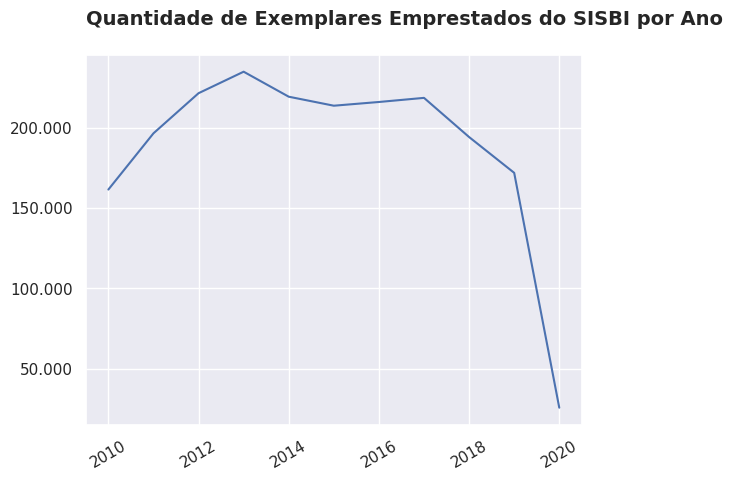

,id_exemplar,data_emprestimo
ano,,
2010,161394,161394
2011,196390,196390
2012,221365,221365
2013,234749,234749
2014,219189,219189
2015,213582,213582
2016,215900,215900
2017,218462,218462
2018,194080,194080


In [16]:
sns.set(style='darkgrid')

ax = sns.lineplot(data=emprestimo_por_ano, x='ano', y='id_exemplar')
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

ax.set_title('Quantidade de Exemplares Emprestados do SISBI por Ano' + '\n', size = 14, loc = 'left', weight='bold')

plt.show()
emprestimo_por_ano

Observa-se uma queda nos empréstimos a partir de 2018 até 2019, diferente dos anos de 2014 a 2017 onde manteve-se uma média 21 mil empréstimos. Quais foram estratégias utilizadas nesse periodo que não foram utilizadas nos últimos anos ?

Válido ressaltar que alguns pontos que podem influenciar a redução dos empréstimo, sendo interessante analisar:

- Houve uma redução na quantidade de alunos da universidade nos últimos anos ?
- O estoque de livros manteve o mesmo ? Aumentou ? Diminuiu ?
- O catálogo de livros foi renovado ? 
- Quais estratégia de Marketing foram utilizadas nos últimos anos ? E quais foram utilizadas antes ?


Válido pontuar também que não é possível avaliar com confiabilidade o ano de 2020, visto que não há dados suficientes.  



## Quantidade de Exemplares emprestado por Mês

In [17]:
emprestimo_por_mes_ano = base_por_ano.groupby(by=base_por_ano['data_emprestimo'].dt.strftime('%m-%Y')).count()
emprestimo_por_mes_ano.index.name ='mes/ano'
emprestimo_por_mes_ano


,id_exemplar,data_emprestimo
mes/ano,,
01-2010,4703,4703
01-2011,1516,1516
01-2012,7336,7336
01-2013,7907,7907
01-2014,15889,15889
...,...,...
12-2015,7114,7114
12-2016,6709,6709
12-2017,5874,5874


In [18]:
emprestimo_por_mes = base_por_ano.groupby(by=base_por_ano['data_emprestimo'].dt.month).count()
emprestimo_por_mes.index.name ='mes'
emprestimo_por_mes

,id_exemplar,data_emprestimo
mes,,
1,67514,67514
2,210200,210200
3,252185,252185
4,208725,208725
5,202530,202530
6,138123,138123
7,123790,123790
8,232793,232793
9,208234,208234


Modificando os números do mês por nome do mês

In [19]:
dic_meses = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun'
             ,7:'Jul',8:'Ago',9:'Set',10:'Out',11:'Nov', 12:'Dez'}

In [20]:
emprestimo_por_mes.index = emprestimo_por_mes.index.map(dic_meses)
emprestimo_por_mes


,id_exemplar,data_emprestimo
mes,,
Jan,67514,67514
Fev,210200,210200
Mar,252185,252185
Abr,208725,208725
Mai,202530,202530
Jun,138123,138123
Jul,123790,123790
Ago,232793,232793
Set,208234,208234


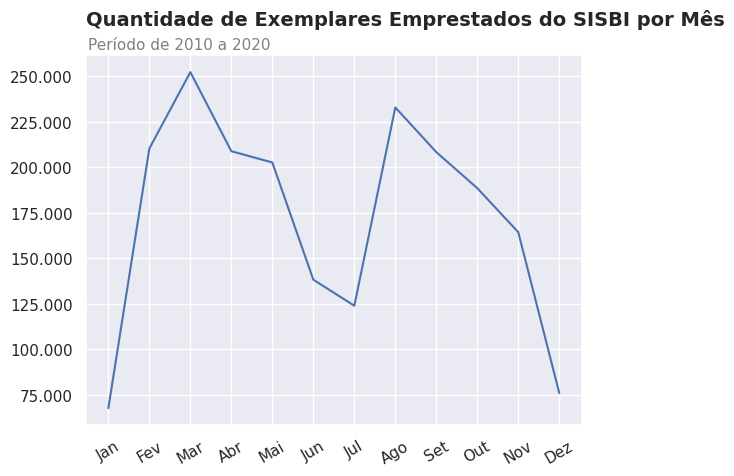

,id_exemplar,data_emprestimo
mes,,
Jan,67514,67514
Fev,210200,210200
Mar,252185,252185
Abr,208725,208725
Mai,202530,202530
Jun,138123,138123
Jul,123790,123790
Ago,232793,232793
Set,208234,208234


In [21]:
sns.set(style='darkgrid')

ax = sns.lineplot(data=emprestimo_por_mes, x='mes', y='id_exemplar')
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', rotation=30)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

ax.set_title('Quantidade de Exemplares Emprestados do SISBI por Mês'+ '\n', size = 14, loc = 'left', weight='bold')
ax.text(s='Período de 2010 a 2020' ,x=-0.5,y=265000,fontsize=11, ha='left',color='gray')


plt.show()
emprestimo_por_mes

Foi constatado que os periodos de *março* e *agosto* possuem o maior número de emprestimo, não sendo, portanto, os meses ideiais para a maior parte dos colaboradores usufruir de suas férias.

Já os meses de *janeiro*, *fevereiro* e *dezembro* apesar de terem pouca demanda de empréstimos, ainda sim, são meses utilizados para o planjemanto letivo do ano. 
Portanto os meses de *junho* e *julho* seriam os ideais para os colaboradores da biblioteca usufruirem das suas férias. 

## Quantidade de emprestado por Faixa de Horário

In [22]:
base_por_ano.data_emprestimo

0         2010-01-04 07:44:10.721
1         2010-03-01 12:40:56.212
2         2010-01-04 07:44:10.750
3         2010-02-11 11:16:30.335
4         2010-03-04 13:36:26.599
                    ...          
2072517   2020-03-17 19:49:10.187
2072518   2020-03-17 19:51:15.700
2072519   2020-03-17 20:00:11.416
2072520   2020-03-17 20:47:18.741
2072521   2020-03-17 21:22:22.138
Name: data_emprestimo, Length: 2072522, dtype: datetime64[ns]

In [23]:
emprestimo_por_hora = base_por_ano.groupby(by=base_por_ano['data_emprestimo'].dt.hour).count()
emprestimo_por_hora.index.name = 'horas'
emprestimo_por_hora = emprestimo_por_hora.reset_index()
emprestimo_por_hora

,horas,id_exemplar,data_emprestimo
0,0,17,17
1,6,14,14
2,7,18777,18777
3,8,103416,103416
4,9,131273,131273
5,10,185839,185839
6,11,180048,180048
7,12,148754,148754
8,13,126987,126987
9,14,150876,150876


In [24]:
emprestimo_por_hora = emprestimo_por_hora.sort_values(ascending=True,by='id_exemplar')
emprestimo_por_hora


,horas,id_exemplar,data_emprestimo
1,6,14,14
0,0,17,17
18,23,51,51
17,22,247,247
2,7,18777,18777
16,21,51191,51191
14,19,102129,102129
3,8,103416,103416
8,13,126987,126987
15,20,127716,127716


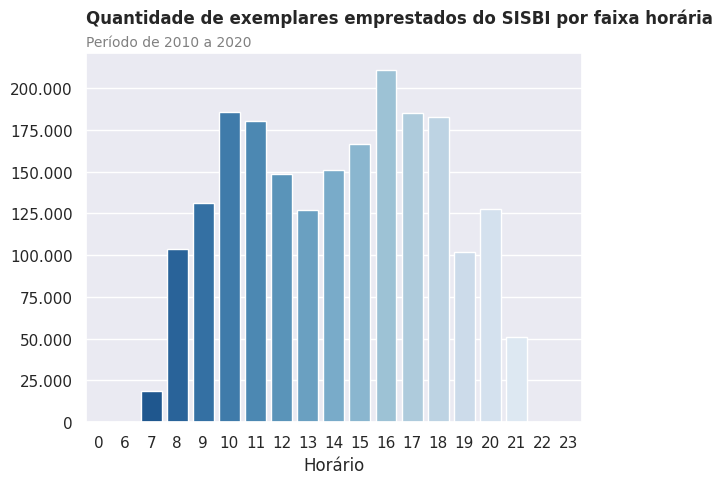

In [25]:
ax = sns.barplot(data=emprestimo_por_hora,y='id_exemplar',x='horas',
                 palette='Blues_r',hue='horas',dodge=False) 

plt.legend([],[],frameon=False)  

ax.set(xlabel='Horário',ylabel=None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))           
ax.set_title("Quantidade de exemplares emprestados do SISBI por faixa horária"+"\n",size=12,loc='left',weight='bold')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=225000,fontsize=10, ha='left',color='gray')

plt.show()

É possível constatar que o maior pico de atendimento acontece entre as 10h e 16h, o que coincide com os horários de aula, periodo em que há maior quantidade de alunos na universidade.

Portanto, os horários do inicio manhã (7h aS 9h) e a noite (19h as 21h) sãos os horários mais indicados para realizar atividades que não envolvem atendimento ao cliente.

## Quantidade de Empréstimo por Tipo de Vinculo do Aluno

In [26]:
dados_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        object        
 5   matricula_ou_siape    string        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  classe                object        
dtypes: datetime64[ns](2), int64(3), object(7), string(1)
memory usage: 221.4+ MB


In [27]:
dados_completo.tipo_vinculo_usuario.unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'DOCENTE EXTERNO', 'SERVIDOR TÉCNICO-ADMINISTRATIVO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

In [28]:
dados_completo.colecao.unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [29]:
dados_completo.biblioteca.unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [30]:
dados_completo.classe.unique()

array(['Ciências aplicadas', 'Linguagem', 'Ciências sociais',
       'Geografia. Biografia. História.',
       'Matemática e ciências naturais', 'Religião', 'Generalidades',
       'Filosofia e psicologia', 'Belas artes'], dtype=object)

In [31]:
def tab_freq(coluna): 

    df = pd.DataFrame(dados_completo[coluna].value_counts())
    df.columns = ['quantidade']

    df['percentual'] = round( (df['quantidade'] / df['quantidade'].sum())*100 ,1)
    
    return df


## Quantos empréstimo por Tipo de Vínculo do Usuário

In [32]:
tab_freq('tipo_vinculo_usuario')

,quantidade,percentual
ALUNO DE GRADUAÇÃO,1612324,77.8
ALUNO DE PÓS-GRADUAÇÃO,302541,14.6
DOCENTE,70981,3.4
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.6
ALUNO MÉDIO/TÉCNICO,28029,1.4
DOCENTE EXTERNO,23949,1.2
USUÁRIO EXTERNO,2509,0.1
OUTROS,5,0.0


O maior público da biblioteca são de fato os alunos da graduação e pós-graduação, que computam respectivamente 78% e 15%.

Possívelmente a diferente entre esses dois percentuais, dizem respeito as caracteristicas de sua atividades, uma vez que, os alunos da pós-graduação estão focados na leitura de artigos cienticos. Outra causa desta diferença pode se dar pela maior quantidade de aluno da graduação em relação aos da pós-graduação. 

## Quantos empréstimo por Coleção ? 

In [33]:
tab_freq('colecao')

,quantidade,percentual
Acervo Circulante,2053120,99.1
Multimeios,7954,0.4
Monografias,4021,0.2
Dissertações,2406,0.1
Obras de Referência,1954,0.1
Publicações de Autores do RN,866,0.0
Publicações da UFRN,764,0.0
Teses,714,0.0
Folhetos,271,0.0
Necessidades Educacionais Específicas,130,0.0


Quase que a totalidade dos empréstimos são feitos por livros do acervo circulante. Para melhor entender o acesso por coleção, seria interessante identificar outras maneiras de acesso ao contéudo em questão, uma vez que, monografias e dissertações podem ser acessadas via online em grande parte das universidade por meio de seus respectivos site institucionais. 

## Quantidade de empréstimo por Biblioteca 

In [34]:
tab_freq('biblioteca')

,quantidade,percentual
Biblioteca Central Zila Mamede,1426122,68.8
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.7
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.7
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.2
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,3.0
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.2
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,2.0
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.5
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.4
Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ - Macaiba,27219,1.3


Possivelmente pelo seu tamanho, a biblioteca central possui a maior dos empréstimo. 

Outras métricas interessantes para avaliar melhor as performances das demais bibliotecas, seria:

- Identificar a quantidade esperada de empréstimo por biblioteca
- Identificar a quantidade e quais estão usuários cadastrados por biblioteca e seus respectivos empréstimos.


## Quantidade de empréstimo por CDU geral? 

In [35]:
tab_freq('classe')

,quantidade,percentual
Ciências aplicadas,1425473,68.8
Ciências sociais,369536,17.8
Matemática e ciências naturais,68744,3.3
Generalidades,62521,3.0
Religião,62295,3.0
Filosofia e psicologia,60563,2.9
Geografia. Biografia. História.,7989,0.4
Belas artes,7911,0.4
Linguagem,7490,0.4


Observa-se um predominio maior do empréstimos de livros classificados como ciências aplicadas e sociais. 

Alguns aspectos a serem avaliados e melhor entendidos seria entender o motivo pelo qual livros de classe Geografia. Biografia. História não possuem uma quantidade significativa de empréstimos. 

Algumas questões podem ser pontuadas:

- O acervo para estas classes estão atualizados ? 
- Qual material didático utilizado pelos professores das graduações ? Os livros utilizados pelos professores estão disponíveis na biblioteca ? 

## Análise Boxplot

Alunos Graduação

In [36]:
dados_completo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072522 entries, 0 to 2072521
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        object        
 5   matricula_ou_siape    string        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  classe                object        
dtypes: datetime64[ns](2), int64(3), object(7), string(1)
memory usage: 221.4+ MB


In [37]:
dados_completo['tipo_vinculo_usuario'].unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'DOCENTE EXTERNO', 'SERVIDOR TÉCNICO-ADMINISTRATIVO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO', 'OUTROS'], dtype=object)

Alunos da Graduação

In [38]:
emprestimo_alunos_grad = dados_completo[(dados_completo['tipo_vinculo_usuario']== 'ALUNO DE GRADUAÇÃO')]
emprestimo_alunos_grad.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaT,2010-01-04 07:44:10.750,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaT,2010-02-11 11:16:30.335,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,750168,L167050,2010-04-20 08:40:47.151,2010-04-06 09:43:02.740,2010/05/05 18:33:53.974000000,200719882.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


In [39]:
emprestimo_alunos_grad['tipo_vinculo_usuario'].unique()

array(['ALUNO DE GRADUAÇÃO'], dtype=object)

In [40]:
emprestimo_alunos_grad[['data_emprestimo', 'colecao']].groupby(by='colecao').count().sort_values(by='data_emprestimo', ascending=False).reset_index()

,colecao,data_emprestimo
0,Acervo Circulante,1600155
1,Multimeios,4652
2,Monografias,3572
3,Dissertações,1152
4,Obras de Referência,1047
5,Publicações de Autores do RN,595
6,Publicações da UFRN,466
7,Teses,245
8,Folhetos,180
9,Trabalho Acadêmico,81


In [41]:
emprestimo_alunos_grad = emprestimo_alunos_grad[(emprestimo_alunos_grad['colecao'] == 'Acervo Circulante')]

emprestimo_alunos_grad['data_emprestimo'] = pd.to_datetime(emprestimo_alunos_grad['data_emprestimo'])
emprestimo_alunos_grad['ano'] = emprestimo_alunos_grad['data_emprestimo'].dt.year
emprestimo_alunos_grad['mes'] = emprestimo_alunos_grad['data_emprestimo'].dt.month

emprestimo_alunos_grad = emprestimo_alunos_grad[['ano', 'mes', 'data_emprestimo']]
emprestimo_alunos_grad.columns = ['ano', 'mes', 'quantidade']
df_grad = emprestimo_alunos_grad.groupby(['ano', 'mes']).count().reset_index().sort_values(by='quantidade', ascending=False)


<ipython-input-41-f89066f601b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emprestimo_alunos_grad['data_emprestimo'] = pd.to_datetime(emprestimo_alunos_grad['data_emprestimo'])


In [42]:
import plotly.express as px

def gera_box_plot(dataset, x, y, titulo, subtitulo):

    fig = px.box(dataset, 
                x=x, 
                y=y,
                title= f"{titulo}<br><sup>{subtitulo}</sup>",
                width=900, height=600)
    
    fig.update_layout(title_font_size=22,font_size=15,xaxis_title=None)

    fig.show()

In [43]:
gera_box_plot(dataset = df_grad,x='ano', y='quantidade', titulo='Distribuição dos empréstimos mensais', 
              subtitulo='Realizados pelos alunos de graduação no acervo circulante')

In [44]:
df_grad.drop(index=[95, 84], inplace=True)
df_grad[(df_grad['ano'] == 2017)]

,ano,mes,quantidade
86,2017,3,21735
91,2017,8,21031
88,2017,5,17633
92,2017,9,16410
87,2017,4,15861
85,2017,2,15641
93,2017,10,14641
94,2017,11,12721
89,2017,6,12677
90,2017,7,10951


In [45]:
df_grad.drop(index=[53, 59], inplace=True)
df_grad[(df_grad['ano'] == 2014)]

,ano,mes,quantidade
49,2014,2,20460
56,2014,9,19674
55,2014,8,19452
57,2014,10,17089
50,2014,3,15746
54,2014,7,14923
51,2014,4,14613
58,2014,11,13690
52,2014,5,13445
48,2014,1,12476


In [46]:
gera_box_plot(dataset = df_grad,x='ano', y='quantidade', titulo='Distribuição dos empréstimos mensais', 
              subtitulo='Realizados pelos alunos de graduação no acervo circulante')



Alunos Pós-Graduação

In [47]:
emprestimo_alunos_pos = dados_completo[(dados_completo['tipo_vinculo_usuario']== 'ALUNO DE PÓS-GRADUAÇÃO')]

emprestimo_alunos_pos = emprestimo_alunos_pos[(emprestimo_alunos_pos['colecao'] == 'Acervo Circulante')]
emprestimo_alunos_pos['data_emprestimo'] = pd.to_datetime(emprestimo_alunos_pos['data_emprestimo'])
emprestimo_alunos_pos['ano'] = emprestimo_alunos_pos['data_emprestimo'].dt.year
emprestimo_alunos_pos['mes'] = emprestimo_alunos_pos['data_emprestimo'].dt.month

emprestimo_alunos_pos = emprestimo_alunos_pos[['ano', 'mes', 'data_emprestimo']]
emprestimo_alunos_pos.columns = ['ano', 'mes', 'quantidade']
df_pos = emprestimo_alunos_pos.groupby(['ano', 'mes']).count().reset_index().sort_values(by='quantidade', ascending=False)

In [48]:
gera_box_plot(dataset = df_pos,x='ano', y='quantidade', titulo='Distribuição dos empréstimos mensais', 
              subtitulo='Realizados pelos alunos de graduação no acervo circulante')

## Adionando novos dados e extraindo novas métricas

In [49]:
df_antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/blob/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx?raw=true',
                              sheet_name='Até 2010')

df_depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/blob/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx?raw=true',
                              sheet_name='Após 2010')


df_antes_2010.head()

,Matricula de alunos até 2010,Unnamed: 1,Unnamed: 2
0,Número da matrícula,Tipo de vinculo,Curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS


In [50]:
df_antes_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']
df_antes_2010.drop(index=0, inplace=True)
df_antes_2010

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
5,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7722,2009075211.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7723,2009075249.0,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7724,2009075294.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7725,2009075300.0,ALUNO DE GRADUAÇÃO,MÚSICA


In [51]:
df_depois_2010.head()

,Matricula de alunos após 2010,Unnamed: 1,Unnamed: 2
0,Matricula,Tipo de vinculo,Cursos
1,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO
2,2010000035.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
3,2010001290.0,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
4,2010002849.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL


In [52]:
df_depois_2010.columns = ['matricula_ou_siape','tipo_vinculo_usuario','curso']
df_depois_2010.drop(index=0, inplace=True)
df_depois_2010

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO
2,2010000035.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
3,2010001290.0,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
4,2010002849.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
5,2010003381.0,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2270,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
2271,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
2272,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2273,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [53]:
df_usuarios_excel = pd.concat([df_antes_2010,df_depois_2010], ignore_index= True)
df_usuarios_excel['matricula_ou_siape'] = df_usuarios_excel['matricula_ou_siape'].astype('string')
df_usuarios_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
9996,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
9997,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


Importando Cadastro dos Usuários JSON

In [54]:
df_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?raw=true')
df_json.head()

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [55]:
df_usuarios_json = pd.read_json(df_json['registros'][0])
df_usuarios_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [56]:
df_usuarios_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  int64 
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [57]:
df_usuarios_json['matricula_ou_siape'] =  df_usuarios_json['matricula_ou_siape'].astype('float')
df_usuarios_json['matricula_ou_siape'] =  df_usuarios_json['matricula_ou_siape'].astype('string')
df_usuarios_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  string
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: object(2), string(1)
memory usage: 1.4+ MB


Concatenando dados de origem JSON e Excel

In [58]:
df_usuarios_completo = pd.concat([df_usuarios_excel, df_usuarios_json], ignore_index=True)
df_usuarios_completo

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


## Empréstimos dos Alunos da Graduação a partir de 2015

In [59]:
df_emprestimo_graduacao = dados_completo[(dados_completo['tipo_vinculo_usuario']== 'ALUNO DE GRADUAÇÃO')]

df_emprestimo_graduacao = df_emprestimo_graduacao.loc[:, ['matricula_ou_siape','data_emprestimo']]
df_emprestimo_graduacao = df_emprestimo_graduacao.query('data_emprestimo > 2015').reset_index(drop = True)

df_emprestimo_graduacao

,matricula_ou_siape,data_emprestimo
0,2014083920.0,2015-02-03 14:56:17.005
1,2014083949.0,2015-03-06 13:16:57.907
2,2014083920.0,2015-04-06 16:58:10.691
3,2014083920.0,2015-05-27 17:39:48.592
4,2014084089.0,2015-07-28 17:46:49.875
...,...,...
788099,20160144295.0,2020-03-17 18:33:29.752
788100,20150109837.0,2020-03-17 19:49:10.187
788101,20190035012.0,2020-03-17 19:51:15.700
788102,20150129867.0,2020-03-17 20:47:18.741


Linhas vazias

In [60]:
df_emprestimo_graduacao.isna().sum()

matricula_ou_siape    94
data_emprestimo        0
dtype: int64

In [61]:
df_emprestimo_graduacao = df_emprestimo_graduacao.dropna()
df_emprestimo_graduacao

,matricula_ou_siape,data_emprestimo
0,2014083920.0,2015-02-03 14:56:17.005
1,2014083949.0,2015-03-06 13:16:57.907
2,2014083920.0,2015-04-06 16:58:10.691
3,2014083920.0,2015-05-27 17:39:48.592
4,2014084089.0,2015-07-28 17:46:49.875
...,...,...
788099,20160144295.0,2020-03-17 18:33:29.752
788100,20150109837.0,2020-03-17 19:49:10.187
788101,20190035012.0,2020-03-17 19:51:15.700
788102,20150129867.0,2020-03-17 20:47:18.741


 Filtrando Cursos Selecionados

In [62]:
df_cursos_selecionados =  df_usuarios_completo.query("curso == ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS','COMUNICAÇÃO SOCIAL','DIREITO','FILOSOFIA','PEDAGOGIA']")
df_cursos_selecionados

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


Unindo dataframes Cadastro e Emprestimo

In [63]:
df_cursos_selecionados = df_emprestimo_graduacao.merge(df_cursos_selecionados)


In [64]:
df_cursos_selecionados

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20180154181.0,2018-09-18 20:07:53.876,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
1,20180154181.0,2020-03-04 16:17:32.383,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
2,20180154181.0,2018-12-07 19:00:16.733,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
3,20180154181.0,2018-08-21 19:39:07.928,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
4,20180154181.0,2018-09-28 18:38:58.259,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...,...
212833,20200023906.0,2020-03-13 08:45:15.420,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
212834,20190121101.0,2020-03-13 09:08:44.544,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
212835,20200144278.0,2020-03-13 09:16:50.082,ALUNO DE GRADUAÇÃO,PEDAGOGIA
212836,20190067212.0,2020-03-13 21:41:01.524,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


In [65]:
df_cursos_selecionados['data_emprestimo'] = df_cursos_selecionados['data_emprestimo'].dt.year
df_cursos_selecionados

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
1,20180154181.0,2020,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
2,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
3,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
4,20180154181.0,2018,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...,...
212833,20200023906.0,2020,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
212834,20190121101.0,2020,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
212835,20200144278.0,2020,ALUNO DE GRADUAÇÃO,PEDAGOGIA
212836,20190067212.0,2020,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


In [66]:
df_cursos_selecionados = df_cursos_selecionados.loc[:, ['data_emprestimo', 'curso']].value_counts().reset_index()
df_cursos_selecionados.columns = ['Ano', 'Curso', 'Quantidade de Emprestimos']
df_cursos_selecionados

,Ano,Curso,Quantidade de Emprestimos
0,2017,COMUNICAÇÃO SOCIAL,8253
1,2016,COMUNICAÇÃO SOCIAL,7973
2,2017,DIREITO,7885
3,2015,BIBLIOTECONOMIA,7784
4,2015,DIREITO,7665
5,2016,FILOSOFIA,7576
6,2015,CIÊNCIAS SOCIAIS,7489
7,2017,PEDAGOGIA,7434
8,2017,FILOSOFIA,7389
9,2016,DIREITO,7363


## Quantidade de Empréstimo por Cursos de 2015 a 2020

In [67]:
tb_aluno_grad = df_cursos_selecionados.pivot_table(
    index = 'Curso',
    columns = 'Ano',
    values = 'Quantidade de Emprestimos', 
    fill_value = '-',
    aggfunc= sum,
     margins = True,
     margins_name = 'TOTAL',
)
tb_aluno_grad

Ano,2015,2016,2017,2018,2019,2020,TOTAL
Curso,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
TOTAL,44224,44087,45186,39353,34864,5124,212838


# Variação Percentual dos empréstimos

In [68]:
import pandas as pd

Arquivo em Excel

In [69]:
df_antes_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/blob/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx?raw=true',
                              sheet_name='Até 2010')

df_depois_2010 = pd.read_excel('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/blob/main/Dia_6-Novos_dados_novas_analises/Datasets/matricula_alunos.xlsx?raw=true',
                              sheet_name='Após 2010')


df_antes_2010.head()

,Matricula de alunos até 2010,Unnamed: 1,Unnamed: 2
0,Número da matrícula,Tipo de vinculo,Curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS


In [70]:
df_antes_2010.columns  =  ['matricula_ou_siape','tipo_vinculo_usuario','curso']
df_antes_2010.drop(index=0, inplace=True)
df_antes_2010

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
2,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
3,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
4,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
5,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7722,2009075211.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7723,2009075249.0,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7724,2009075294.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7725,2009075300.0,ALUNO DE GRADUAÇÃO,MÚSICA


In [71]:
df_depois_2010.columns  =  ['matricula_ou_siape','tipo_vinculo_usuario','curso']
df_depois_2010.drop(index=0, inplace=True)
df_depois_2010

,matricula_ou_siape,tipo_vinculo_usuario,curso
1,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO
2,2010000035.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
3,2010001290.0,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
4,2010002849.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
5,2010003381.0,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2270,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
2271,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
2272,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2273,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


Concatenando os dois arquivos em excel

In [72]:
usuarios_excel = pd.concat([df_antes_2010,df_depois_2010], ignore_index = True)
usuarios_excel


,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
9995,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
9996,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
9997,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
9998,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [73]:
usuarios_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    10000 non-null  object
 1   tipo_vinculo_usuario  10000 non-null  object
 2   curso                 10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [74]:
usuarios_excel['matricula_ou_siape'] = usuarios_excel['matricula_ou_siape'].astype('string')
usuarios_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    10000 non-null  string
 1   tipo_vinculo_usuario  10000 non-null  object
 2   curso                 10000 non-null  object
dtypes: object(2), string(1)
memory usage: 234.5+ KB


## Importando arquivo json - Dados Cadastro

In [75]:
df_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?raw=true')
df_json.head()

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [76]:
usuarios_posgrad_json = pd.read_json(df_json.registros[1])
usuarios_posgrad_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [77]:
usuarios_posgrad_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  int64 
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: int64(1), object(2)
memory usage: 455.8+ KB


Concatenando bases de cadastro JSON e Excel 

In [78]:
usuarios_cursos = pd.concat([usuarios_excel, usuarios_posgrad_json], ignore_index = True)

In [79]:
usuarios_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29440 entries, 0 to 29439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    29440 non-null  object
 1   tipo_vinculo_usuario  29440 non-null  object
 2   curso                 29440 non-null  object
dtypes: object(3)
memory usage: 690.1+ KB


In [80]:
usuarios_cursos['tipo_vinculo_usuario'].unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO'], dtype=object)

In [81]:
usuarios_cursos_posgrad = usuarios_cursos.query("tipo_vinculo_usuario == 'ALUNO DE PÓS-GRADUAÇÃO'")
usuarios_cursos_posgrad['matricula_ou_siape'] = usuarios_cursos_posgrad['matricula_ou_siape'].astype('float')
usuarios_cursos_posgrad['matricula_ou_siape'] = usuarios_cursos_posgrad['matricula_ou_siape'].astype('string')
usuarios_cursos_posgrad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19440 entries, 10000 to 29439
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    19440 non-null  string
 1   tipo_vinculo_usuario  19440 non-null  object
 2   curso                 19440 non-null  object
dtypes: object(2), string(1)
memory usage: 607.5+ KB


<ipython-input-81-b3528489d919>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-81-b3528489d919>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df_emprestimo_graduacao = dados_completo[(dados_completo['tipo_vinculo_usuario']== 'ALUNO DE PÓS-GRADUAÇÃO')]

df_emprestimo_graduacao = df_emprestimo_graduacao.loc[:, ['matricula_ou_siape','data_emprestimo']]
df_emprestimo_graduacao = df_emprestimo_graduacao.query('data_emprestimo > 2017').reset_index(drop = True)

df_emprestimo_graduacao

,matricula_ou_siape,data_emprestimo
0,20171029059.0,2017-03-28 09:04:09.781
1,20181014102.0,2018-03-16 10:01:49.789
2,20161026732.0,2018-02-26 14:42:38.950
3,20181019459.0,2018-03-21 13:38:16.932
4,20171004425.0,2018-05-25 19:01:42.414
...,...,...
92118,20161034609.0,2020-03-17 16:20:01.906
92119,20161034609.0,2020-03-17 16:20:01.992
92120,20181021671.0,2020-03-17 16:46:55.065
92121,20181021822.0,2020-03-17 17:13:00.546


In [95]:
emprestimo_posgrad_completo = df_emprestimo_graduacao.merge(usuarios_cursos_posgrad)
emprestimo_posgrad_completo

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20171029059.0,2017-03-28 09:04:09.781,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
1,20171029059.0,2017-05-09 15:07:27.165,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
2,20171029059.0,2017-06-12 08:37:05.048,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
3,20171029059.0,2018-03-19 10:10:03.552,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,20171029059.0,2018-08-24 19:36:53.956,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
...,...,...,...,...
92057,20201006310.0,2020-03-12 13:45:36.288,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92058,20201006310.0,2020-03-12 13:45:36.326,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92059,20191006490.0,2020-03-12 16:10:31.448,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92060,20201011795.0,2020-03-16 12:24:44.550,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO


In [96]:
emprestimo_posgrad_completo['data_emprestimo'] = emprestimo_posgrad_completo['data_emprestimo'].dt.year


In [97]:
emprestimo_posgrad_completo

,matricula_ou_siape,data_emprestimo,tipo_vinculo_usuario,curso
0,20171029059.0,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
1,20171029059.0,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
2,20171029059.0,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
3,20171029059.0,2018,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,20171029059.0,2018,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
...,...,...,...,...
92057,20201006310.0,2020,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92058,20201006310.0,2020,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92059,20191006490.0,2020,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92060,20201011795.0,2020,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO


Valores de Empréstimo

In [98]:
emprestimo_posgrad_completo = emprestimo_posgrad_completo.iloc[:, [1,3]].value_counts().reset_index()
emprestimo_posgrad_completo.columns = ['ANO','CURSO','QUANTIDADE_EMPRESTIMOS']
emprestimo_posgrad_completo.head()


,ANO,CURSO,QUANTIDADE_EMPRESTIMOS
0,2018,CIÊNCIAS ODONTOLÓGICAS,2540
1,2017,ADMINISTRAÇÃO,2538
2,2017,ENGENHARIA DE SOFTWARE,2477
3,2017,CIÊNCIAS DA SAÚDE,2434
4,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415


In [100]:
emprestimo_posgrad_completo_pivot = emprestimo_posgrad_completo.pivot_table(
    index = 'CURSO',
    columns = 'ANO',
    values = 'QUANTIDADE_EMPRESTIMOS'
)

emprestimo_posgrad_completo_pivot

ANO,2017,2018,2019,2020
CURSO,,,,
ADMINISTRAÇÃO,2538,2316,1692,269
ARQUITETURA E URBANISMO,2209,1917,1818,257
ARTES CÊNICAS,2115,2082,1812,229
BIOINFORMÁTICA,2190,1914,1825,263
BIOQUÍMICA,2294,1944,2057,272
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303
CIÊNCIAS DA SAÚDE,2434,1986,1825,234
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352


Importando Previsão 2022

In [135]:
previsao_2022 = pd.read_table('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_7-Apresentando_resultados_em_HTML/Dataset/previsao')

In [139]:
previsao_2022

,curso previsao_2022
0,administracao 1905
1,arquitetura_e_urbanismo 1896
2,artes_cenicas 1920
3,bioinformatica 2302
4,bioquimica 2090
5,ciencia_e_engenharia_de_materiais 2010
6,ciencia_tecnologia_e_inovacao 1960
7,ciencias_da_saude 1730
8,ciencias_odontologicas 2405
9,design 1900


In [140]:
previsao_2022 = previsao_2022['curso previsao_2022'].str.split(' ', expand = True)
previsao_2022

,0,1
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [141]:
previsao_2022[1] = previsao_2022[1].astype('int')
previsao_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14 non-null     object
 1   1       14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 352.0+ bytes


In [142]:
emprestimo_posgrad_completo_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, ADMINISTRAÇÃO to GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2017    14 non-null     int64
 1   2018    14 non-null     int64
 2   2019    14 non-null     int64
 3   2020    14 non-null     int64
dtypes: int64(4)
memory usage: 560.0+ bytes


Unindo Tabelas

In [143]:
previsao_2022.index = emprestimo_posgrad_completo_pivot.index

emprestimo_posgrad_completo_pivot['2022'] = previsao_2022.iloc[:,1]
emprestimo_posgrad_completo_pivot

ANO,2017,2018,2019,2020,2022
CURSO,,,,,
ADMINISTRAÇÃO,2538,2316,1692,269,1905
ARQUITETURA E URBANISMO,2209,1917,1818,257,1896
ARTES CÊNICAS,2115,2082,1812,229,1920
BIOINFORMÁTICA,2190,1914,1825,263,2302
BIOQUÍMICA,2294,1944,2057,272,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303,1960
CIÊNCIAS DA SAÚDE,2434,1986,1825,234,1730
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352,2405


Função Cálculo Diferença Percentual

In [144]:
def diferenca_percent(x, y): 
  return round(((x-y)/y)*100, 2)

In [147]:
percentual_2018 = diferenca_percent(emprestimo_posgrad_completo_pivot.iloc[:,1],emprestimo_posgrad_completo_pivot.iloc[:,0])
percentual_2019 = diferenca_percent(emprestimo_posgrad_completo_pivot.iloc[:,2],emprestimo_posgrad_completo_pivot.iloc[:,1])
percentual_2022 = diferenca_percent(emprestimo_posgrad_completo_pivot.iloc[:,3],emprestimo_posgrad_completo_pivot.iloc[:,2])

In [154]:
percentual = pd.DataFrame(
    {'2018':percentual_2018,
     '2019':percentual_2019,
     '2022':percentual_2022
     }
)

percentual

,2018,2019,2022
CURSO,,,
ADMINISTRAÇÃO,-8.75,-26.94,-84.10
ARQUITETURA E URBANISMO,-13.22,-5.16,-85.86
ARTES CÊNICAS,-1.56,-12.97,-87.36
BIOINFORMÁTICA,-12.60,-4.65,-85.59
BIOQUÍMICA,-15.26,5.81,-86.78
CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,-83.67
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.33,-85.04
CIÊNCIAS DA SAÚDE,-18.41,-8.11,-87.18
CIÊNCIAS ODONTOLÓGICAS,5.22,-15.98,-83.51


Primeira letra em maiúsculo e as demais em minúsculo

In [155]:
percentual.reset_index(inplace=True)
percentual.columns = percentual.columns.str.capitalize()
percentual.Curso = percentual.Curso.str.capitalize()

percentual


,Curso,2018,2019,2022
0,Administração,-8.75,-26.94,-84.10
1,Arquitetura e urbanismo,-13.22,-5.16,-85.86
2,Artes cênicas,-1.56,-12.97,-87.36
3,Bioinformática,-12.60,-4.65,-85.59
4,Bioquímica,-15.26,5.81,-86.78
5,Ciência e engenharia de materiais,-8.89,-4.83,-83.67
6,"Ciência, tecnologia e inovação",-2.07,-14.33,-85.04
7,Ciências da saúde,-18.41,-8.11,-87.18
8,Ciências odontológicas,5.22,-15.98,-83.51
9,Design,-19.10,0.16,-86.20


Tabela em HTML

Estruturando formatação da tabela em CSS

In [156]:

th_props = [
  ('font-size', '1.4rem'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', 'whitesmoke'),
  ('background-color', '#001692'),
  ('border-radius', '0.25rem'),
  ('box-shadow','0 0 1rem gray')
  ]

td_props = [
  ('font-size', '1rem'),
  ('padding','0.5rem'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('border-bottom','0.1rem solid lightgray')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

Gerando tabela em HTML

In [158]:
percentual.style.text_gradient(cmap='RdYlGn',low=1, axis=1,vmax=0.1,vmin=0)\
                              .format('{:.2f} %',subset=['2018','2019','2022'])\
                              .hide_index()\
                              .set_table_styles(styles)\
                              .to_html('teste.html',doctype_html =True,
                                       table_attributes='ALIGN=LEFT WIDTH=50% CELLSPACING = 5')
     

<ipython-input-158-a0ca5ccd1ee4>:3: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`

